# Introduction

**Basic implementation of SmartFinance+ using a hypothetical transaction data to predict future transactions using Linear Regression** 

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating a hypothetical dataset for historical transaction records
np.random.seed(1)
n_samples = 1000
amounts = np.random.randint(10, 200 , size=n_samples)
categories = np.random.choice(['Groceries','Entertainment','Utilities','Dining','Transportation'], size=n_samples)

In [3]:
# Create a Dataframe
data = pd.DataFrame({'Amount':amounts , 'Category':categories})
data

,Amount,Category
0,47,Groceries
1,150,Utilities
2,82,Transportation
3,147,Transportation
4,143,Entertainment
...,...,...
995,193,Transportation
996,38,Dining
997,126,Entertainment
998,53,Entertainment


In [4]:
from sklearn.linear_model import LinearRegression

# Creating the SmartFinance+ class
class SmartFinance:
    def __init__(self):
        self.transactions = None
    
    def load_transactions_from_data(self, data):
        self.transactions = data
    
    def predict_future_transaction(self):
        if self.transactions is None:
            print("No transaction data loaded")
            return
        
        # Preprocess data
        X = self.transactions[['Amount']].values.reshape(-1, 1)  # Feature: Transaction amount
        y = pd.get_dummies(self.transactions['Category'])  # Target: One-hot encoded category
        
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
        
        # Train Linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)  # Learn the relationship between transaction amount and expenditure category
        
        # Making predictions
        y_pred = model.predict(X_test)
        
        # Calculate mean squared error
        mse = mean_squared_error(y_test, y_pred)
        print("Mean Squared Error:", mse)
        
        # Example prediction
        example_amount = 100  # Example transaction amount
        predicted_expenditure = model.predict([[example_amount]])
        print("Predicted Expenditure for $100:", predicted_expenditure)
        
        # Visualizing actual vs predicted expenditures (scatter plot)
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(X_test, y_test.values.argmax(axis=1), color='green', label="Actual Expenditure")
        plt.scatter(X_test, y_pred.argmax(axis=1), color='red', label="Predicted Expenditure")
        plt.xlabel('Amount')
        plt.ylabel('Category')
        plt.title('Actual Vs Predicted Expenditure (Scatter Plot)')
        plt.grid(True)
        plt.legend()
        
        # Visualizing transaction density (heatmap plot)
        plt.subplot(1, 2, 2)
        heatmap_data = pd.pivot_table(self.transactions, values='Amount', index='Category', aggfunc='count')
        sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='g')
        plt.xlabel('Amount')
        plt.ylabel('Category')
        plt.title('Transaction Density (Heatmap)')
        plt.tight_layout()
        plt.show()

Mean Squared Error: 0.1609623576690808
Predicted Expenditure for $100: [[0.21525671 0.17871292 0.18569227 0.20898843 0.21134966]]


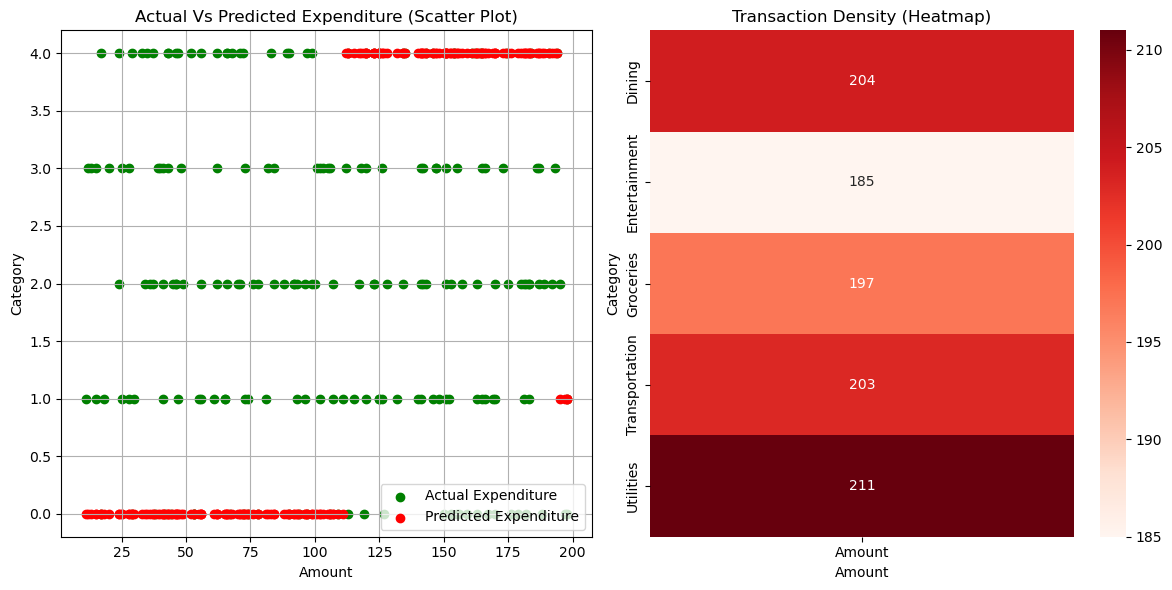

In [5]:
# Initialize SmartFinance and load data
sf = SmartFinance()
sf.load_transactions_from_data(data)
sf.predict_future_transaction()